In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import warnings
import graphviz
from tqdm import tqdm_notebook

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

sns.set(font_scale=1.5)
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv('data/train_5.csv')
df = df1.copy()

# Информация о таблице

#### Описание столбцов

- **PassengerId** - Уникальный идентификатор для каждого пассажира. Каждый идентификатор принимает форму , gggg_ppгде ggggуказывает группу, с которой путешествует пассажир, и ppявляется их номером в группе. Люди в группе часто являются членами семьи, но не всегда.
- **HomePlanet** - Планета, с которой вылетел пассажир, как правило, планета его постоянного проживания.
- **CryoSleep** - Указывает, решил ли пассажир быть переведен в режим анабиоза на время рейса. Пассажиры, находящиеся в криосонном состоянии, находятся в своих каютах.
- **Cabin** - Номер каюты, в которой находится пассажир. Принимает вид deck/num/side, где sideможет быть либо Pза левый , либо Sза правый борт .
- **Destination** - Планета, на которую будет высаживаться пассажир.
- **Age** - Возраст пассажира.
- **VIP** - Оплатил ли пассажир специальное VIP-обслуживание во время рейса.
- **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, **VRDeck**- Сумма, которую пассажир выставил в счет за каждое из многочисленных роскошных удобств космического корабля Титаник .
- **Name** - Имя и фамилия пассажира.
- **Transported** - Был ли пассажир перенесён в другое измерение. Это цель, столбец, который вы пытаетесь предсказать.

In [3]:
display(df)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


Проверим на дубликаты

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Доля пропусков в столбцах

In [6]:
cols_null_percent = df.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

CryoSleep       2.496261
ShoppingMall    2.392730
VIP             2.335212
HomePlanet      2.312205
Name            2.300702
Cabin           2.289198
VRDeck          2.162660
FoodCourt       2.105142
Spa             2.105142
Destination     2.093639
RoomService     2.082135
Age             2.059128
dtype: float64

In [7]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
df.describe(include=['object'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [9]:
df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [10]:
df['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [11]:
df['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [12]:
df['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [13]:
df['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [14]:
df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

Посмотрим распределение данных относительно целеыого признака

<AxesSubplot: xlabel='Destination', ylabel='count'>

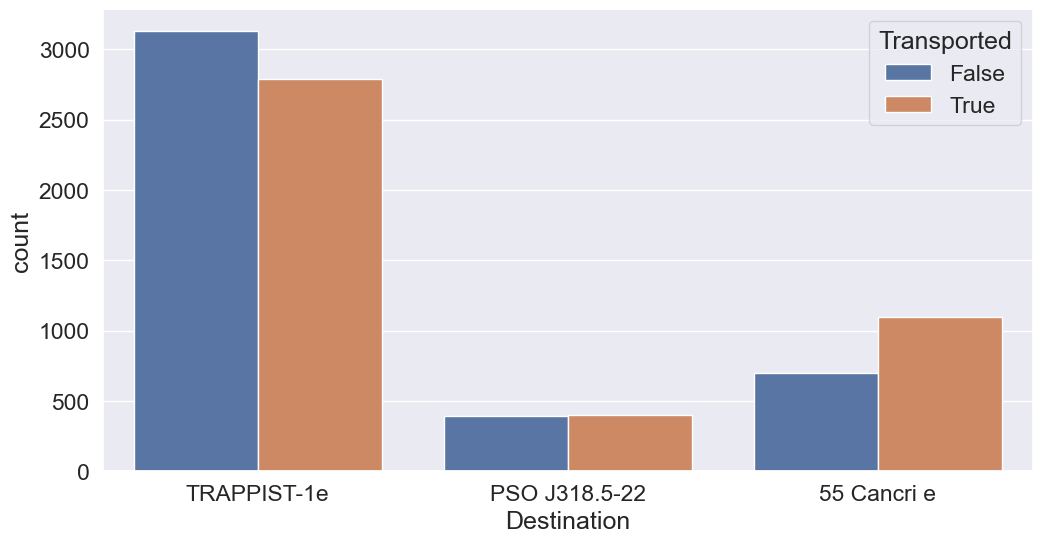

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Destination', data=df, hue='Transported')

<AxesSubplot: xlabel='CryoSleep', ylabel='count'>

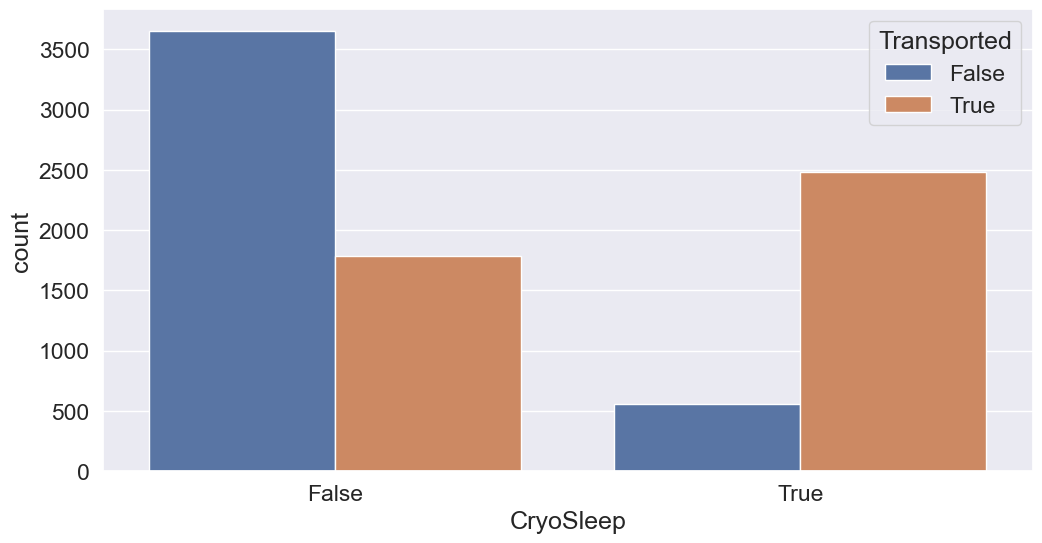

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x='CryoSleep', data=df, hue='Transported')

<AxesSubplot: xlabel='VIP', ylabel='count'>

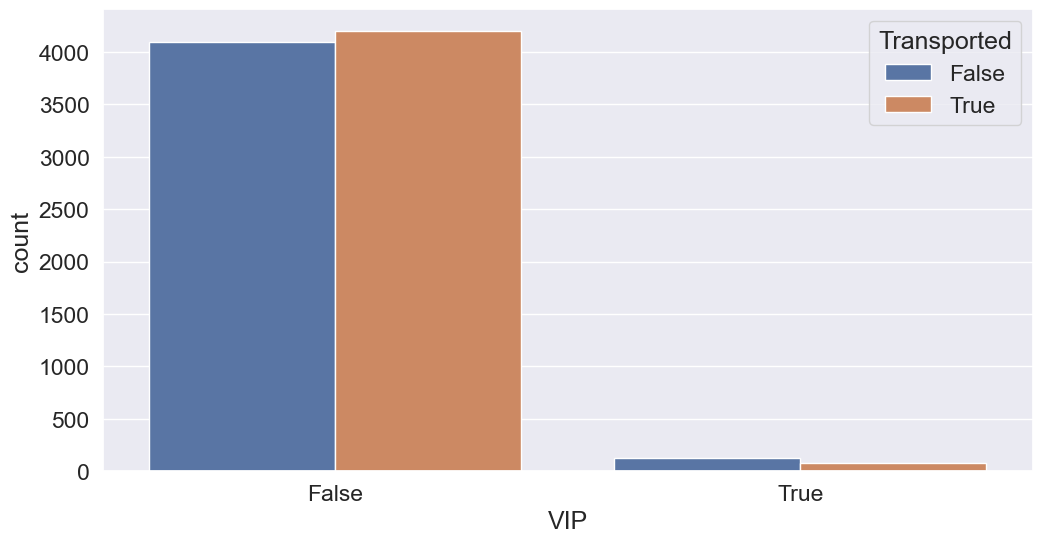

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='VIP', data=df, hue='Transported')

<AxesSubplot: xlabel='HomePlanet', ylabel='count'>

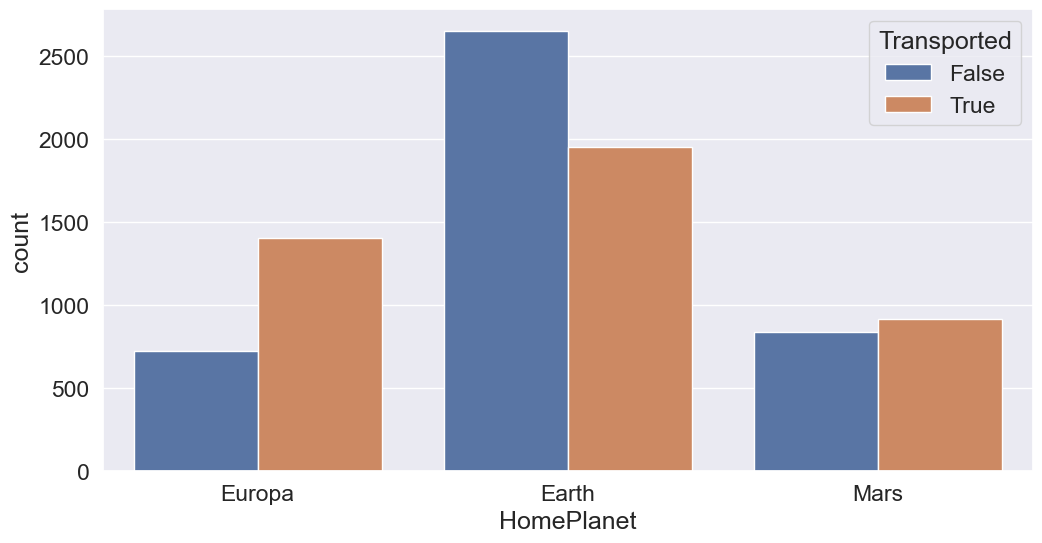

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(x='HomePlanet', data=df, hue='Transported')

# Преобразование признаков

#### Признак Age

In [19]:
df['Age'].value_counts()

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64

#### Новый признак SpentMoney

Для начала заполним пропуски в составляющих признаках. Будем считать, что если  нет значения, то пассажир ничего не потратил на данное развлечение

In [20]:
df['RoomService'] = df['RoomService'].fillna(0)
df['FoodCourt'] = df['FoodCourt'].fillna(0)
df['ShoppingMall'] = df['ShoppingMall'].fillna(0)
df['Spa'] = df['Spa'].fillna(0)
df['VRDeck'] = df['VRDeck'].fillna(0)

Создадим новый признак Spent_money, который содержит сумму, которую пассажир потратил на развлечения на корабле

In [21]:
df['SpentMoney'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']

После этого можно избавиться от столбцов RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

In [22]:
df = df.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1)

#### Признак Transported

Обработаем столбец Transported. Заменим True и False на 1 и 0

In [23]:
df.loc[df.Transported == False, 'Transported'] = 0
df.loc[df.Transported == True, 'Transported'] = 1

#### Признак CryoSleep

Проверим, есть ли среди пассажиров с незаполненным параметром CryoSleep те, кто тратил деньги во время путешествия

In [24]:
df[df['CryoSleep'].isnull()==True][['CryoSleep','SpentMoney']]

,CryoSleep,SpentMoney
92,NaN,0.0
98,NaN,703.0
104,NaN,2018.0
111,NaN,0.0
152,NaN,990.0
...,...,...
8620,NaN,0.0
8651,NaN,0.0
8664,NaN,0.0
8675,NaN,2056.0


Такие есть. Очевидно, что пассажиры, погруженные в сон во время рейса, не могут платить деньги за развлечения, поэтому заполним пропущенные значения в соответствии с этим наблюдением

In [25]:
df.loc[((df['CryoSleep'].isnull()==True) & (df.SpentMoney>0)), 'CryoSleep'] = 0
df.loc[((df['CryoSleep'].isnull()==True) & (df.SpentMoney==0)), 'CryoSleep'] = 1

Обработаем столбец CryoSleep. Заменим True и False на 1 и 0

In [26]:
df.loc[df.CryoSleep == False, 'CryoSleep'] = 0
df.loc[df.CryoSleep == True, 'CryoSleep'] = 1

#### Признак VIP

Обработаем столбец VIP. Заменим True и False на 1 и 0

In [27]:
df.loc[df.VIP == False, 'VIP'] = 0
df.loc[df.VIP == True, 'VIP'] = 1

#### Признак HomePlanet

Заполним пропуски в столбце

In [28]:
df['HomePlanet'] = df['HomePlanet'].fillna('Europa')

Обработаем столбец HomePlanet. Заменим True и False на 1 и 0

In [29]:
df.loc[df.HomePlanet == 'Earth', 'HomePlanet'] = 1
df.loc[df.HomePlanet == 'Europa', 'HomePlanet'] = 2
df.loc[df.HomePlanet == 'Mars', 'HomePlanet'] = 3

#### Признак Destination

Обработаем столбец Destination. Заменим True и False на 1 и 0

In [30]:
df.loc[df.Destination == 'TRAPPIST-1e', 'Destination'] = 1
df.loc[df.Destination == '55 Cancri e', 'Destination'] = 2
df.loc[df.Destination == 'PSO J318.5-22', 'Destination'] = 3

#### Признак Cabin

Выведем из признака Cabin новый признак, показывающий, на левом или правом борту находится пассажир

In [31]:
# функция для вывода борта по номеру кабины
def def_side(Cabin):       
    if str(Cabin)[-1]=='S':
        return 1
    else:
        return 2 

In [32]:
df['Side'] = df['Cabin'].apply(def_side)   

Выведем из признака Cabin новый признак содержащий литерал кабины

In [33]:
# функция для вывода литерала по номеру кабины G/1499/S
def def_literal(Cabin):
    return str(Cabin)[0]

In [34]:
df['Cabin_literal'] = df['Cabin'].apply(def_literal)   

Проверим, какие вариации значений мы получили

In [35]:
df['Cabin_literal'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
n     199
T       5
Name: Cabin_literal, dtype: int64

Обработаем столбец Cabin_literal. Заменим буквенные значения на численные

In [36]:
df.loc[df.Cabin_literal == 'A', 'Cabin_literal'] = 1
df.loc[df.Cabin_literal == 'B', 'Cabin_literal'] = 2
df.loc[df.Cabin_literal == 'C', 'Cabin_literal'] = 3
df.loc[df.Cabin_literal == 'D', 'Cabin_literal'] = 4
df.loc[df.Cabin_literal == 'E', 'Cabin_literal'] = 5
df.loc[df.Cabin_literal == 'F', 'Cabin_literal'] = 6
df.loc[df.Cabin_literal == 'G', 'Cabin_literal'] = 7
df.loc[df.Cabin_literal == 'T', 'Cabin_literal'] = 8
df.loc[df.Cabin_literal == 'n', 'Cabin_literal'] = 9

Мы вытащили всю информацию из признака Cabin, можем удалить столбец

In [37]:
df = df.drop(['Cabin'], axis=1)

#### Признак PassengerId

Из столбца PassengerId выведем количество человек в группе 

In [38]:
# функция для вывода порядкового номера человека в группе
def people_count(PassengerId):
    return int(PassengerId[-1])

In [39]:
df['PeopleCount'] = df['PassengerId'].apply(people_count)

Для удобства добавим столбец NumGroup c номером группы

In [40]:
def num_group(PassengerId):
    return int(PassengerId[0:4])

In [41]:
df['NumGroup']=df['PassengerId'].apply(num_group)

Проверим правильность нашего предположения о количестве родственников

In [42]:
df['PeopleCount'] = df['PeopleCount'].astype('int64')

In [43]:
df[df['PeopleCount']==8][['PassengerId','Name','PeopleCount','NumGroup']]


,PassengerId,Name,PeopleCount,NumGroup
917,0984_08,Alancy Flemaney,8,984
3743,4005_08,NaN,8,4005
3995,4256_08,Gerte Garnes,8,4256
4228,4498_08,Kendy Munozanson,8,4498
4815,5133_08,Lawren Josey,8,5133
5392,5756_08,Wenise Briggston,8,5756
5520,5885_08,Fayene Oneiles,8,5885
7660,8168_08,Ryanne Boyers,8,8168
8169,8728_08,Franda Fulloydez,8,8728
8235,8796_08,Dondy Traverdy,8,8796


In [44]:
df[df['NumGroup']==9081][['PassengerId','Name','PeopleCount','NumGroup']]

,PassengerId,Name,PeopleCount,NumGroup
8507,9081_01,Hanna Clemondsey,1,9081
8508,9081_02,Willah Clemondsey,2,9081
8509,9081_03,Beula Clemondsey,3,9081
8510,9081_04,NaN,4,9081
8511,9081_05,Haryn Clemondsey,5,9081
8512,9081_06,Daryla Clemondsey,6,9081
8513,9081_07,Aliey Clemondsey,7,9081
8514,9081_08,Virgie Clemondsey,8,9081


In [45]:
df[df['NumGroup']==8988][['PassengerId','Name','PeopleCount','NumGroup']]

,PassengerId,Name,PeopleCount,NumGroup
8407,8988_01,Maen Fowlesterez,1,8988
8408,8988_02,Idacey Fowlesterez,2,8988
8409,8988_03,Catha Fowlesterez,3,8988
8410,8988_04,Joanry Malliamsey,4,8988
8411,8988_05,Melara Fowlesterez,5,8988
8412,8988_06,Caseye Fowlesterez,6,8988
8413,8988_07,Heila Malliamsey,7,8988
8414,8988_08,Neila Fowlesterez,8,8988


Мы видим, что в рамках одной группы часто путешествуют однофамильцы, но не всегда. Поэтому выведем 2 признака - количество человек в группе и количество человек в семье

In [46]:
# Временно добавим столбец с индексом
df['index'] = df.index

In [47]:
# Заменяем в признаке PeopleCount порядковый номер в группе на количество человек в группе
for i in df['index'].values:
    num_group = int(df[df['index']==i][['NumGroup']].values)
    one_group = df[df['NumGroup']==num_group][['PassengerId','Name','PeopleCount','NumGroup']]
    people_count = one_group['PeopleCount'].max()
    df.loc[((df.PeopleCount != people_count) & (df.NumGroup == num_group)), 'PeopleCount'] = people_count

In [48]:
df.head(50)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,SpentMoney,Side,Cabin_literal,PeopleCount,NumGroup,index
0,0001_01,2,0,1,39.0,0,Maham Ofracculy,0,0.0,2,2,1,1,0
1,0002_01,1,0,1,24.0,0,Juanna Vines,1,736.0,1,6,1,2,1
2,0003_01,2,0,1,58.0,1,Altark Susent,0,10383.0,1,1,2,3,2
3,0003_02,2,0,1,33.0,0,Solam Susent,0,5176.0,1,1,2,3,3
4,0004_01,1,0,1,16.0,0,Willy Santantines,1,1091.0,1,6,1,4,4
5,0005_01,1,0,3,44.0,0,Sandie Hinetthews,1,774.0,2,6,1,5,5
6,0006_01,1,0,1,26.0,0,Billex Jacostaffey,1,1584.0,1,6,2,6,6
7,0006_02,1,1,1,28.0,0,Candra Jacostaffey,1,0.0,1,7,2,6,7
8,0007_01,1,0,1,35.0,0,Andona Beston,1,1018.0,1,6,1,7,8
9,0008_01,2,1,2,14.0,0,Erraiam Flatic,1,0.0,2,2,3,8,9


#### Признак Name

In [49]:
# Удалим строки, в которых пропущены данные
df.dropna(inplace = True)

Оставим в столбце Name только фамилии

In [50]:
def del_name(Name):
    list_name = str(Name).split()
    return list_name[-1]

In [51]:
df['Name'] = df['Name'].apply(del_name)

По всей видимости, не все люди, являющиеся однофамильцами, являются родственниками. Будем считать родственниками только тех, у кого одна фамилия и кто путешествует в одной каюте

In [52]:
df[df['Name']=='Fowlesterez'][['PassengerId','Name','PeopleCount','NumGroup', 'index']]

,PassengerId,Name,PeopleCount,NumGroup,index
2822,3044_01,Fowlesterez,1,3044,2822
3423,3690_01,Fowlesterez,1,3690,3423
3652,3926_01,Fowlesterez,1,3926,3652
3925,4188_01,Fowlesterez,1,4188,3925
5586,5950_01,Fowlesterez,1,5950,5586
7667,8182_01,Fowlesterez,1,8182,7667
8408,8988_02,Fowlesterez,8,8988,8408
8409,8988_03,Fowlesterez,8,8988,8409
8411,8988_05,Fowlesterez,8,8988,8411
8412,8988_06,Fowlesterez,8,8988,8412


In [53]:
# Создаем признак NumRelatives, который заполним количеством родственников
for i in df['index'].values:
    people_count = int(df[df['index']==i][['PeopleCount']].values)
    if people_count == 1:
            df.loc[(df.index == i),'NumRelatives'] = 1
    else:                         
        surname = str(df[df['index']==i][['Name']].values)
        surname = surname[3:]
        surname = surname[:-3]
        num_group = int(df[df['index']==i][['NumGroup']].values)
        one_group = df[df['NumGroup']==num_group][['PassengerId','Name','PeopleCount','NumGroup']]
        num_relatives = len(one_group[one_group['Name']==surname]['Name'])
        df.loc[(df.index == i),'NumRelatives'] = num_relatives
        

Проверим результаты

In [54]:
df[df['NumGroup']==8988][['PassengerId','Name','PeopleCount','NumGroup', 'index','NumRelatives']]

,PassengerId,Name,PeopleCount,NumGroup,index,NumRelatives
8408,8988_02,Fowlesterez,8,8988,8408,5.0
8409,8988_03,Fowlesterez,8,8988,8409,5.0
8410,8988_04,Malliamsey,8,8988,8410,2.0
8411,8988_05,Fowlesterez,8,8988,8411,5.0
8412,8988_06,Fowlesterez,8,8988,8412,5.0
8413,8988_07,Malliamsey,8,8988,8413,2.0
8414,8988_08,Fowlesterez,8,8988,8414,5.0


In [55]:
df[df['Name']=='Fowlesterez'][['PassengerId','Name','PeopleCount','NumGroup', 'index','NumRelatives']]

,PassengerId,Name,PeopleCount,NumGroup,index,NumRelatives
2822,3044_01,Fowlesterez,1,3044,2822,1.0
3423,3690_01,Fowlesterez,1,3690,3423,1.0
3652,3926_01,Fowlesterez,1,3926,3652,1.0
3925,4188_01,Fowlesterez,1,4188,3925,1.0
5586,5950_01,Fowlesterez,1,5950,5586,1.0
7667,8182_01,Fowlesterez,1,8182,7667,1.0
8408,8988_02,Fowlesterez,8,8988,8408,5.0
8409,8988_03,Fowlesterez,8,8988,8409,5.0
8411,8988_05,Fowlesterez,8,8988,8411,5.0
8412,8988_06,Fowlesterez,8,8988,8412,5.0


Удалим столбцы, которые теперь не нужны

In [56]:
df = df.drop(['index','Name','PassengerId','NumGroup'], axis = 1)

# Преобразование типов

In [57]:
df['HomePlanet'] = df['HomePlanet'].astype('int64')
df['CryoSleep'] = df['CryoSleep'].astype('int64')
df['Destination'] = df['Destination'].astype('int64')
df['VIP'] = df['VIP'].astype('int64')
df['Transported'] = df['Transported'].astype('int64')
df['Cabin_literal'] = df['Cabin_literal'].astype('int64')

# Проверка корреляции

<AxesSubplot: title={'center': 'Pearson Correlation of Features'}>

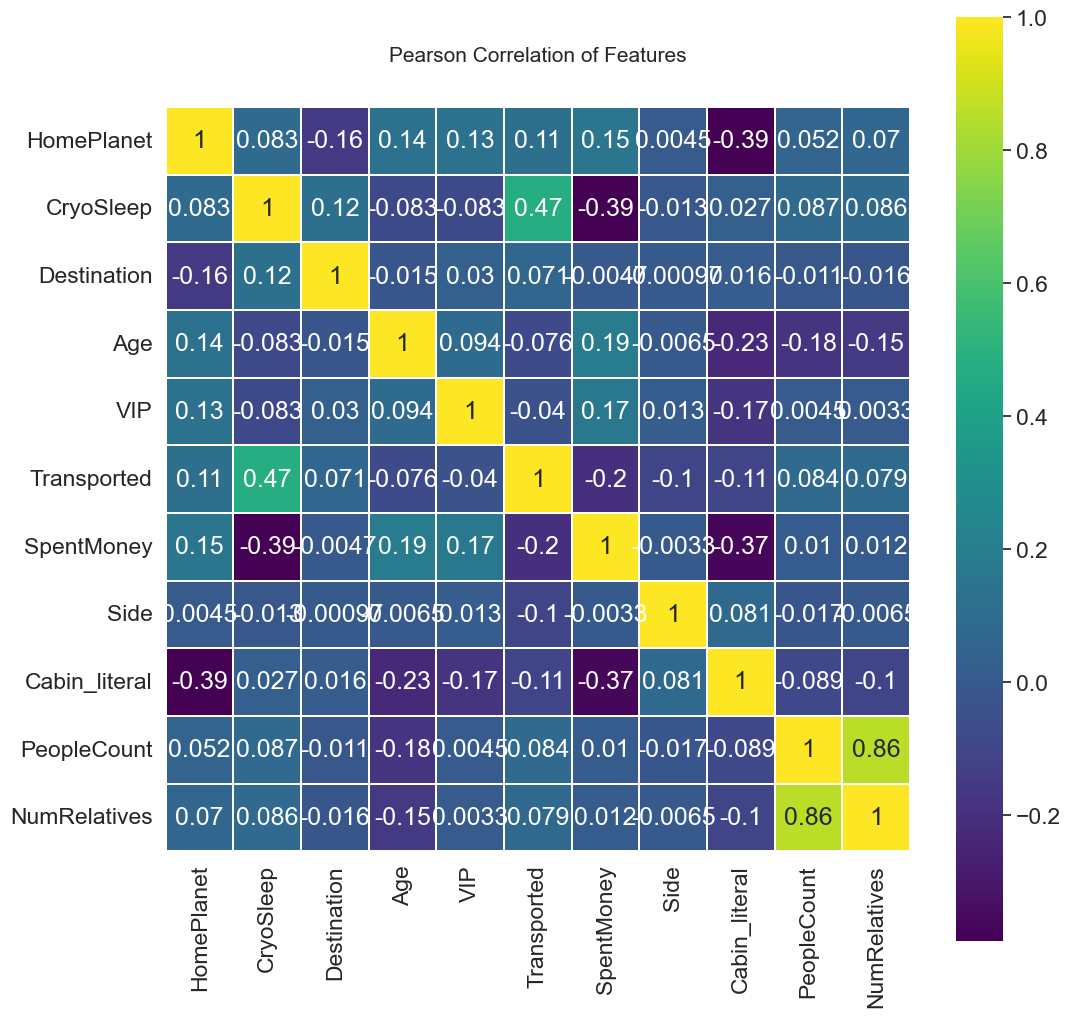

In [58]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Мы видим сильную корреляцию между признаками NumRelatives и PeopleCount и надо избавиться от одного из этих признаков. Лучший результат показало удаление столбца NumRelatives

In [59]:
df = df.drop(['NumRelatives'], axis = 1)

In [60]:
df.corr()['Transported'].sort_values(ascending=False)

Transported      1.000000
CryoSleep        0.469680
HomePlanet       0.112798
PeopleCount      0.083804
Destination      0.071072
VIP             -0.039644
Age             -0.075864
Side            -0.104054
Cabin_literal   -0.105765
SpentMoney      -0.197460
Name: Transported, dtype: float64

In [61]:
#Небольшое улучшение дало удаление этих параметров
df = df.drop(['VIP'], axis = 1)
df = df.drop(['Age'], axis = 1)

# Обучение модели

Напишем функции для обучения и оценки DecisionTreeClassifier и RandomForestClassifier. Для задачи классификации оценивать модели мы будем с помощью метрики **accuracy score** - это доля правильно предсказанных классов. Чтоб оценить работу моделей без привязке к определенному разбиению данных, будем выводить **среднее значение accuracy score для 30-и выборок**.

In [62]:
def try_decision_tree(**model_params):
  
    pipeline = make_pipeline(DecisionTreeClassifier(**model_params))
    
    x = df.drop('Transported', axis = 1)
    y = df['Transported']
    
    n = 30
    
    accuracy = 0
    for i in range(1,n+1):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, train_size=0.75, random_state=i )
        pipeline.fit(x_train, y_train)
        y_pred = pipeline.predict(x_test)
        accuracy+=accuracy_score(y_pred, y_test)
        
    print('accuracy score:', accuracy/n )    

    

In [63]:
def try_random_forest(**model_params):
  
    pipeline = make_pipeline(RandomForestClassifier(**model_params))
    
    x = df.drop('Transported', axis = 1)
    y = df['Transported']
    
    n = 30
    
    accuracy = 0
    for i in range(1,n+1):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, train_size=0.75, random_state=i )
        pipeline.fit(x_train, y_train)
        y_pred = pipeline.predict(x_test)
        accuracy+=accuracy_score(y_pred, y_test)
    print('accuracy score:', accuracy/n )    

   

## DecisionTreeClassifier

DecisionTreeClassifier с параметрами по умолчанию

In [64]:
try_decision_tree()

accuracy score: 0.7054493628437292


Посмотрим, насколько мы сможем улучшить показатель, подобрав дополнительные параметры. Значения параметров выбираются методом ручного подбора. 

In [65]:
try_decision_tree(random_state=44, max_depth = 6)

accuracy score: 0.7441146881287726


Применение параметра min_samples_leaf не дало улучшения. Наилучший подобранный вариант с использованием min_samples_leaf:

In [66]:
try_decision_tree(random_state=44, max_depth = 20, min_samples_leaf = 120)

accuracy score: 0.7425050301810863


Лучший результат мы получили при max_depth = 6.

## RandomForestClassifier

RandomForestClassifier с параметрами по умолчанию

In [67]:
try_random_forest()

accuracy score: 0.7119215291750502


Посмотрим, насколько мы сможем улучшить показатель, подобрав дополнительные параметры

In [68]:
try_random_forest(n_estimators=1, random_state=44, max_depth = 6)

accuracy score: 0.7383635144198524


In [72]:
try_random_forest(n_estimators=80, random_state=44, max_depth = 6)

accuracy score: 0.7455063715627096


# Заключение

Наилучший результат показали: 
- DecisionTreeClassifier с параметрами random_state=44, max_depth = 6
- RandomForestClassifier с параметрами n_estimators=80, random_state=44, max_depth = 6